In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from siuba import _, select, rename, mutate, group_by, arrange, filter, summarize, distinct, left_join

In [101]:
df = pd.read_csv('cleaned_data/census_demographics.csv')

In [102]:
df_health = pd.read_csv('cleaned_data/asthma_clean_file.csv')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   County                             58 non-null     object 
 1   TotalPopulation                    58 non-null     int64  
 2   TotalWhiteNotHispanic              58 non-null     int64  
 3   TotalBlack                         58 non-null     int64  
 4   TotalAsian                         58 non-null     int64  
 5   TotalHispanicLatino                58 non-null     int64  
 6   MedianIncome                       58 non-null     int64  
 7   MedianIncomeForeignBorn            57 non-null     float64
 8   TotalBelowPovertyLine              58 non-null     int64  
 9   TotalForeignBornBelowPoveryLine    58 non-null     int64  
 10  TotalHSDiploma                     58 non-null     int64  
 11  TotalBachelorsDegree               58 non-null     int64  
 

In [104]:
df.describe()

,TotalPopulation,TotalWhiteNotHispanic,TotalBlack,TotalAsian,TotalHispanicLatino,MedianIncome,MedianIncomeForeignBorn,TotalBelowPovertyLine,TotalForeignBornBelowPoveryLine,TotalHSDiploma,...,TotalPop16Above,TotalPop16AboveInLaborForce,TotalPop16AboveNotInLaborForce,TotalPopSurveyInsurance,TotalEmployedWithInsurance,TotalEmployedWithInsurancePrivate,TotalEmployedWithInsurancePublic,TotalEmployedNoInsurance,TotalUnemployedNoInsurance,TotalNotInLaborForceNoInsurance
count,5.800000e+01,5.800000e+01,58.000000,5.800000e+01,5.800000e+01,58.000000,57.000000,5.800000e+01,58.000000,5.800000e+01,...,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,6.773017e+05,2.518157e+05,39208.758621,9.814522e+04,2.642705e+05,30963.620690,27131.947368,8.878866e+04,26633.396552,8.298707e+04,...,5.393908e+05,3.434749e+05,1.959159e+05,6.687472e+05,2.700205e+05,2.310899e+05,45866.758621,29411.465517,3453.982759,10981.706897
std,1.469524e+06,4.362806e+05,114855.088637,2.389240e+05,6.845517e+05,7354.083205,6564.357945,2.079402e+05,75887.363799,1.862458e+05,...,1.180864e+06,7.653985e+05,4.162612e+05,1.457003e+06,5.940364e+05,5.013539e+05,108132.041837,81429.673384,8575.534364,28847.141339
min,1.039000e+03,5.510000e+02,2.000000,0.000000e+00,1.300000e+02,18245.000000,11324.000000,2.050000e+02,0.000000,1.730000e+02,...,8.530000e+02,3.920000e+02,4.610000e+02,1.039000e+03,2.330000e+02,1.900000e+02,68.000000,38.000000,8.000000,38.000000
25%,4.764675e+04,3.079650e+04,644.750000,7.717500e+02,9.949750e+03,25765.500000,23380.000000,5.471000e+03,548.750000,8.501250e+03,...,4.058400e+04,1.936000e+04,1.901325e+04,4.657675e+04,1.507150e+04,1.280825e+04,3084.250000,1487.000000,247.000000,691.750000
50%,1.846320e+05,1.012650e+05,3975.000000,1.036400e+04,5.075650e+04,29496.500000,26197.000000,2.934800e+04,4254.000000,2.147500e+04,...,1.501525e+05,8.436300e+04,6.578950e+04,1.825205e+05,6.652900e+04,5.971300e+04,13602.500000,6234.000000,778.000000,2623.500000
75%,6.927508e+05,2.872638e+05,17474.750000,5.716750e+04,2.535352e+05,33250.000000,30499.000000,7.972250e+04,20836.500000,7.332025e+04,...,5.250925e+05,3.220018e+05,1.862992e+05,6.844030e+05,2.540648e+05,2.105365e+05,44803.750000,22948.000000,3036.000000,8466.750000
max,1.008157e+07,2.641770e+06,820478.000000,1.473221e+06,4.888434e+06,52866.000000,48852.000000,1.480446e+06,553580.000000,1.296682e+06,...,8.123894e+06,5.253694e+06,2.870200e+06,1.001290e+07,4.049389e+06,3.366147e+06,769892.000000,588450.000000,60308.000000,205209.000000


In [105]:
df = (df
  >> mutate(
      WhitePerc = _.TotalWhiteNotHispanic/_.TotalPopulation,
      PovertyPerc = _.TotalBelowPovertyLine/_.TotalPop16Above,
      CollegePerc = _.TotalBachelorsDegree/_.TotalPop16Above,
      TotalUninsured = _.TotalEmployedNoInsurance + _.TotalUnemployedNoInsurance + _.TotalNotInLaborForceNoInsurance,
      UninsuredPerc = _.TotalUninsured/_.TotalPopulation
      )
  )

In [106]:
df_health = (df_health
  >> filter(_.Year == 2019, _.Category == "Total Population", _.Age == "18 and Over")
  >> rename(County = "Geography")
  >> left_join(_, df, on = "County")
  >> filter(_.TotalPopulation > 0)
  )

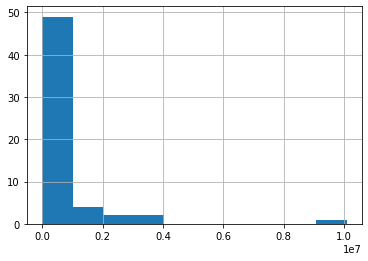

In [6]:
_ = df.TotalPopulation.hist()

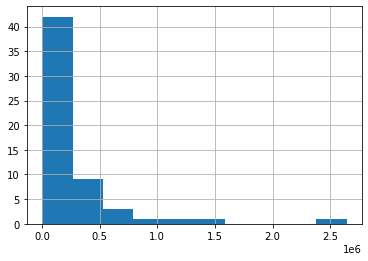

In [7]:
_ = df.TotalWhiteNotHispanic.hist()

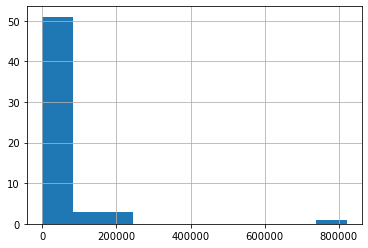

In [8]:
_ = df.TotalBlack.hist()

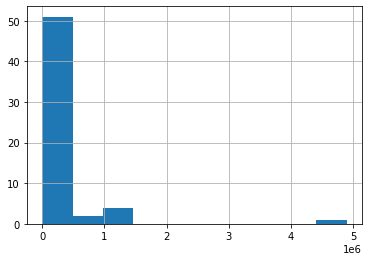

In [9]:
_ = df.TotalHispanicLatino.hist()

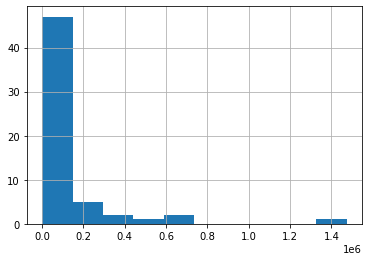

In [10]:
_ = df.TotalAsian.hist()

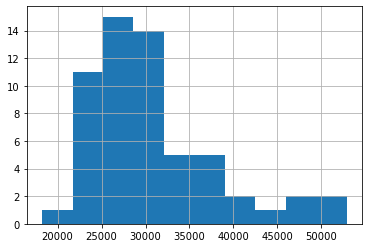

In [11]:
_ = df.MedianIncome.hist()

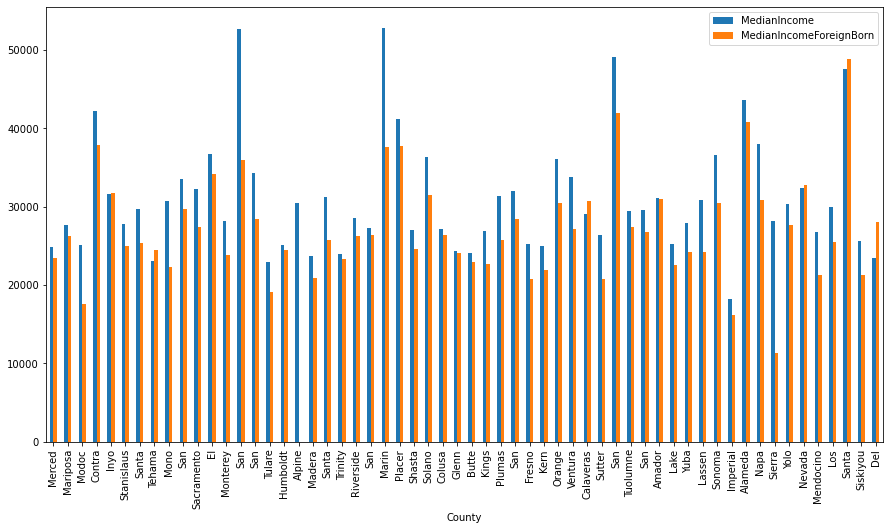

In [12]:
_ = df.plot(x="County", y=["MedianIncome", "MedianIncomeForeignBorn"], kind="bar", figsize = [15,8])

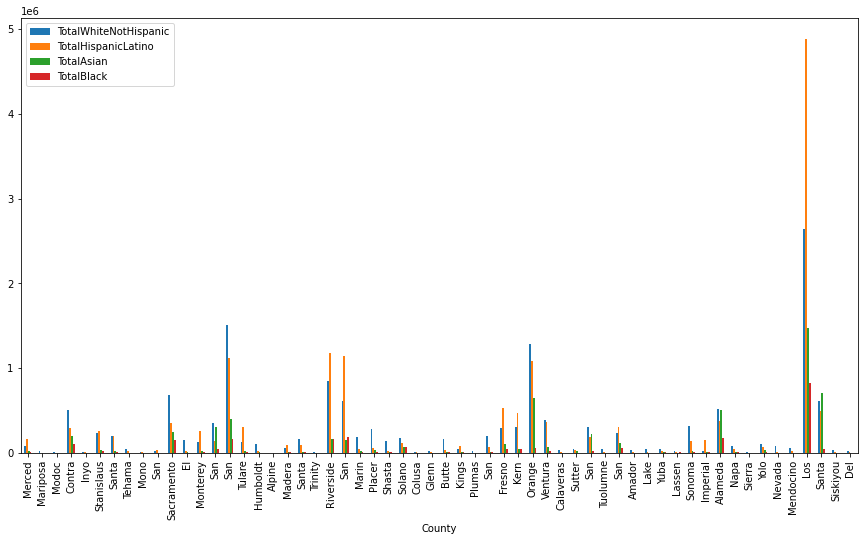

In [13]:
_ = df.plot(x="County", y=["TotalWhiteNotHispanic","TotalHispanicLatino","TotalAsian","TotalBlack"], kind="bar", figsize = [15,8])

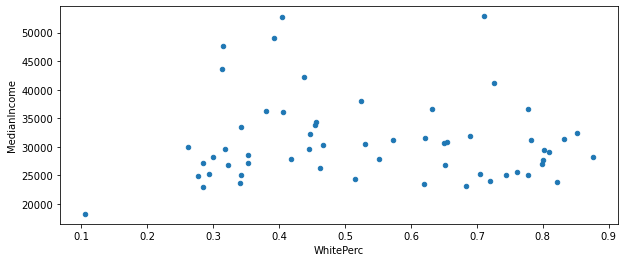

In [14]:
_ = df.plot(x="WhitePerc",y="MedianIncome",kind="scatter", figsize = (10,4))

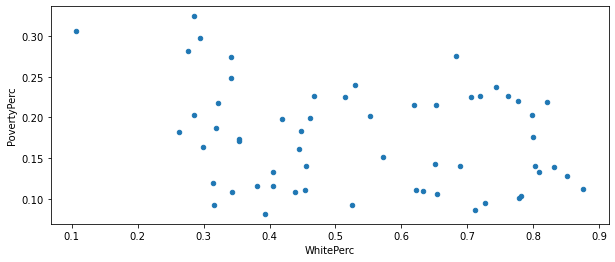

In [15]:
_ = df.plot(x="WhitePerc",y="PovertyPerc",kind="scatter", figsize = (10,4))

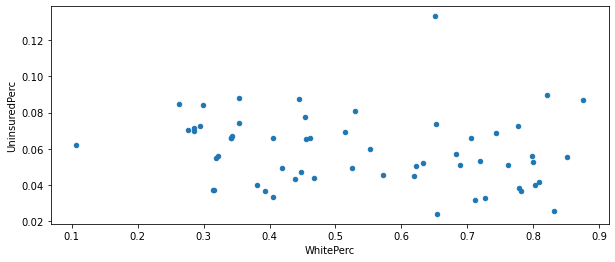

In [16]:
_ = df.plot(x="WhitePerc",y="UninsuredPerc",kind="scatter", figsize = (10,4))

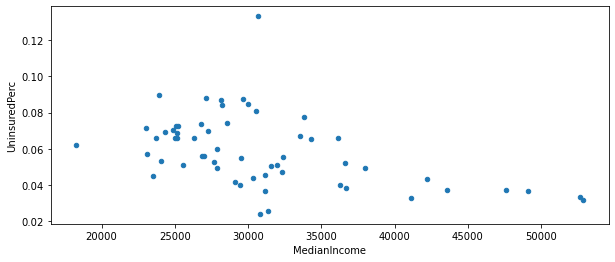

In [17]:
_ = df.plot(x="MedianIncome",y="UninsuredPerc",kind="scatter", figsize = (10,4))

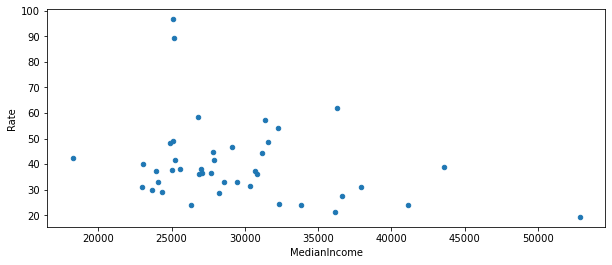

In [97]:
_ = df_health.plot(x="MedianIncome",y="Rate",kind="scatter", figsize = (10,4))

In [107]:
df_corr = (df_health
  >> select(_.WhitePerc, _.PovertyPerc, _.CollegePerc,_.UninsuredPerc,_.MedianIncome, _.Rate, _.Count)
  )

corr = df_corr.corr()

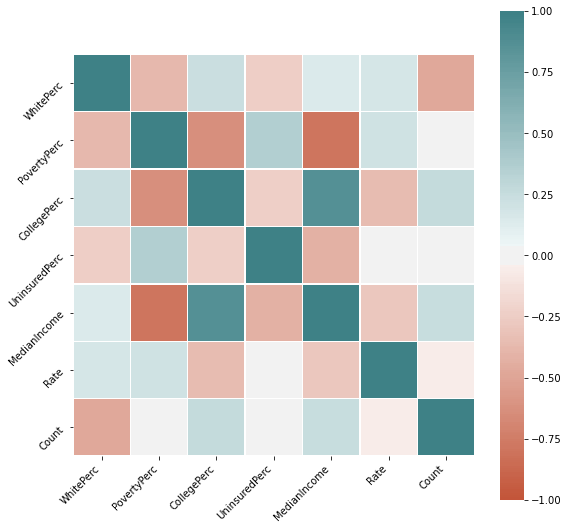

In [108]:
ax = plt.subplots(figsize=(9, 9))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,200,n=200),
    square=True,
    linewidths=.5,
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right'
);

